## 1. Env set up
1. scoop install Python
2. pip install jupyter pandas numpy matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('../MBAAdmission/train.csv')
test_data = pd.read_csv('../MBAAdmission/test.csv')

# having a look at the data
print(train_data.head())
print("--------------------------------")
print(train_data.info())
print("--------------------------------")
print(train_data.describe())

   application_id  gender international   gpa       major      race   gmat  \
0               1  Female         False  3.30    Business     Asian  620.0   
1               2    Male         False  3.28  Humanities     Black    NaN   
2               3  Female          True  3.30    Business       NaN  710.0   
3               4    Male         False  3.47        STEM     Black  690.0   
4               5    Male         False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management    Reject  
2       5.0             Technology     Admit  
3       NaN             Technology    Reject  
4       5.0             Consulting    Reject  
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id

MBA Admission Dataset - Complete Data Processing

Task 1: Basic Statistics
Numerical variables: ['application_id', 'gpa', 'gmat', 'work_exp']
Categorical variables: ['gender', 'international', 'major', 'race', 'work_industry', 'admission']

Numerical Statistics:
       application_id          gpa         gmat     work_exp
count     6095.000000  5790.000000  5790.000000  5790.000000
mean      3104.612141     3.249636   650.818653     5.021934
std       1785.573306     0.151287    49.415865     1.034741
min          1.000000     2.650000   570.000000     1.000000
25%       1560.500000     3.150000   610.000000     4.000000
50%       3101.000000     3.250000   650.000000     5.000000
75%       4651.500000     3.350000   680.000000     6.000000
max       6194.000000     3.770000   780.000000     9.000000

Categorical Statistics:

gender:
  Count: 5790
  Unique: 2
  Value counts:
gender
Male      3702
Female    2088
Name: count, dtype: int64

international:
  Count: 5790
  Unique: 2
  Value

C:\Users\admin.DESKTOP-AL5KP1O\AppData\Local\Temp\ipykernel_8264\2035195968.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_processed[col].fillna(mean_val, inplace=True)
C:\Users\admin.DESKTOP-AL5KP1O\AppData\Local\Temp\ipykernel_8264\2035195968.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

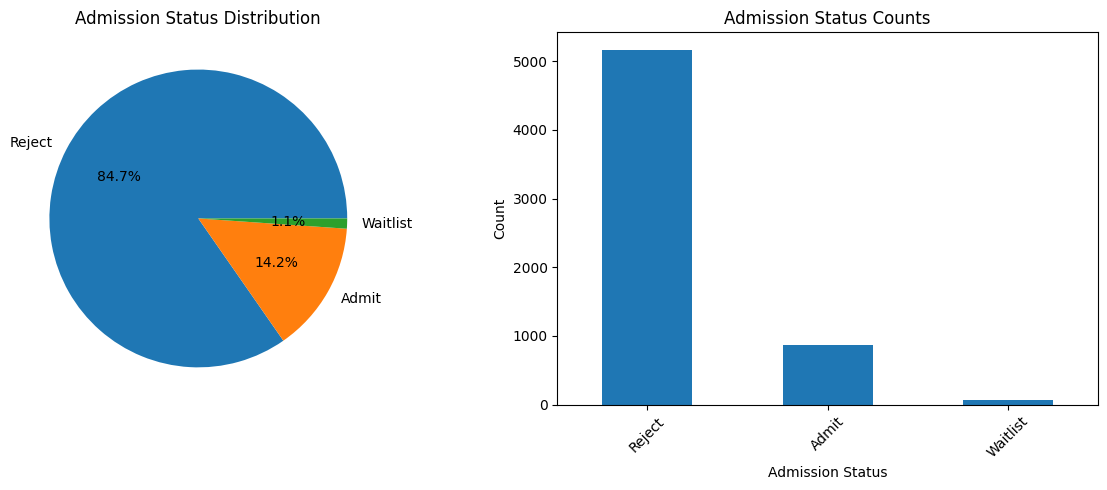

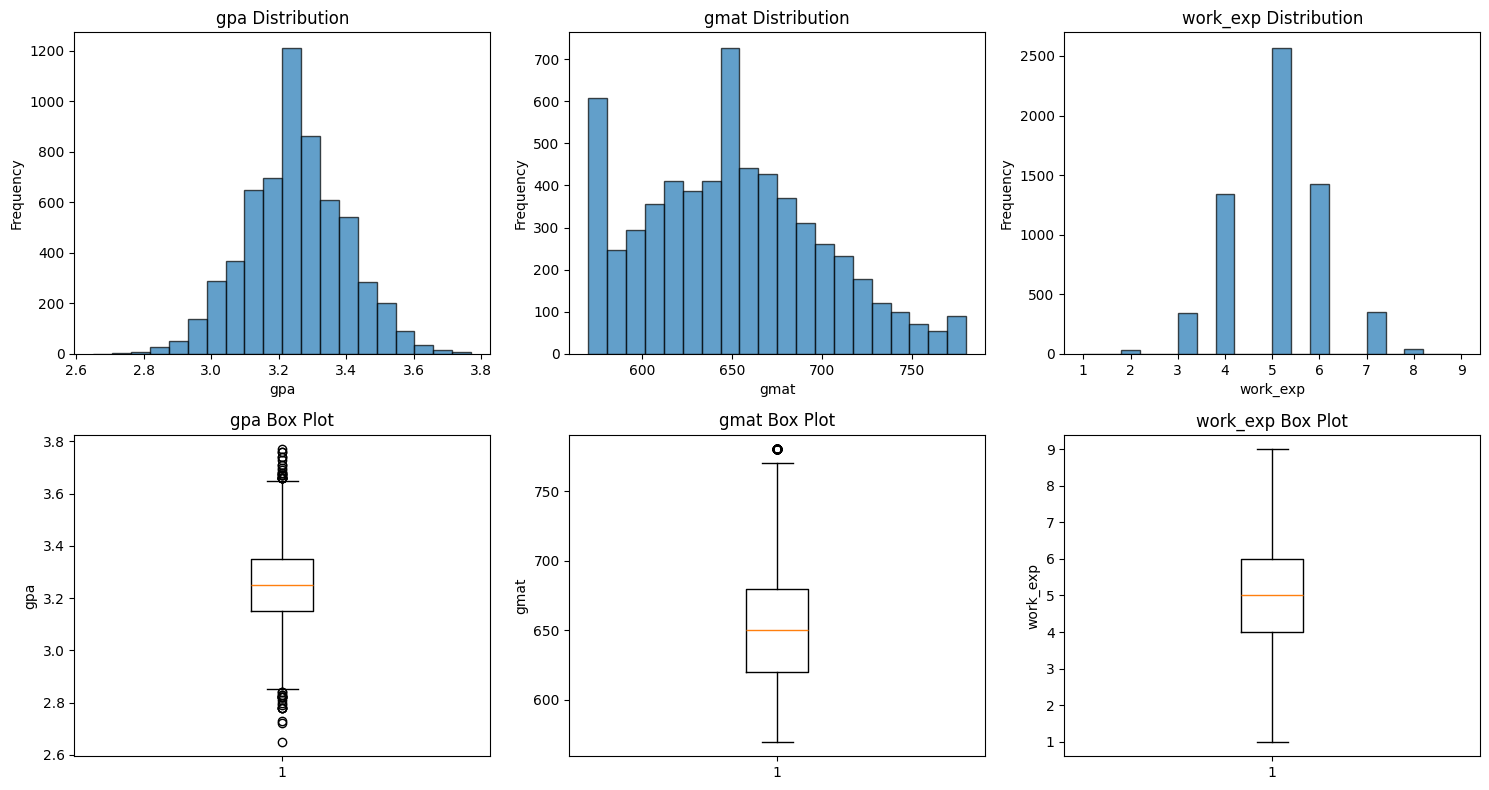

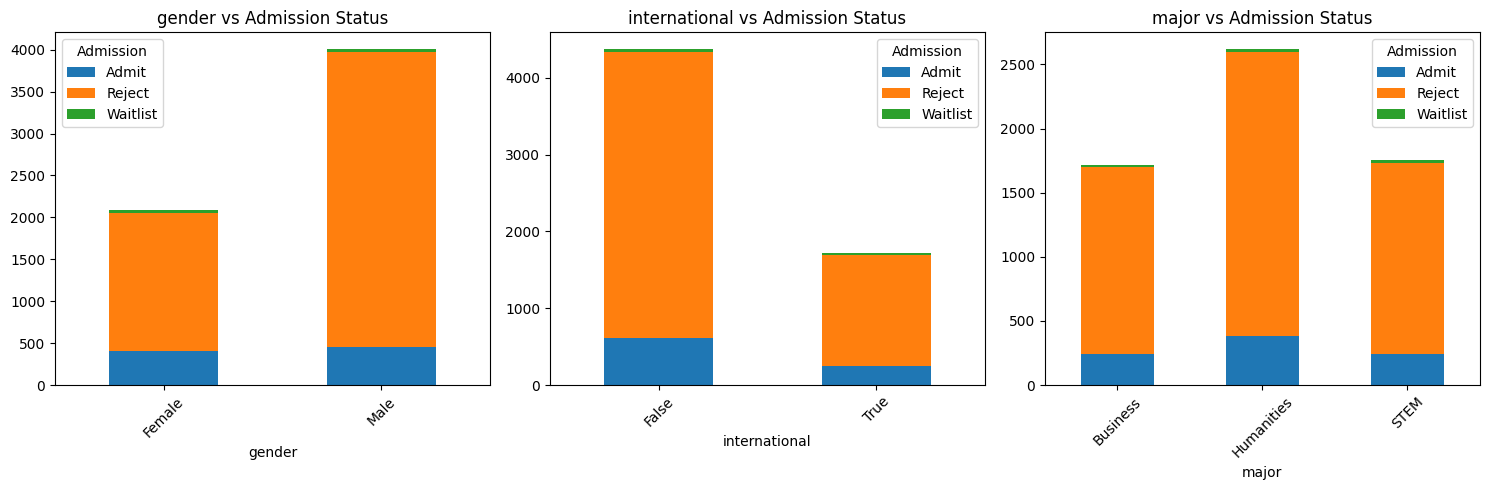


Task 6: Correlation Analysis and Additional Data Exploration


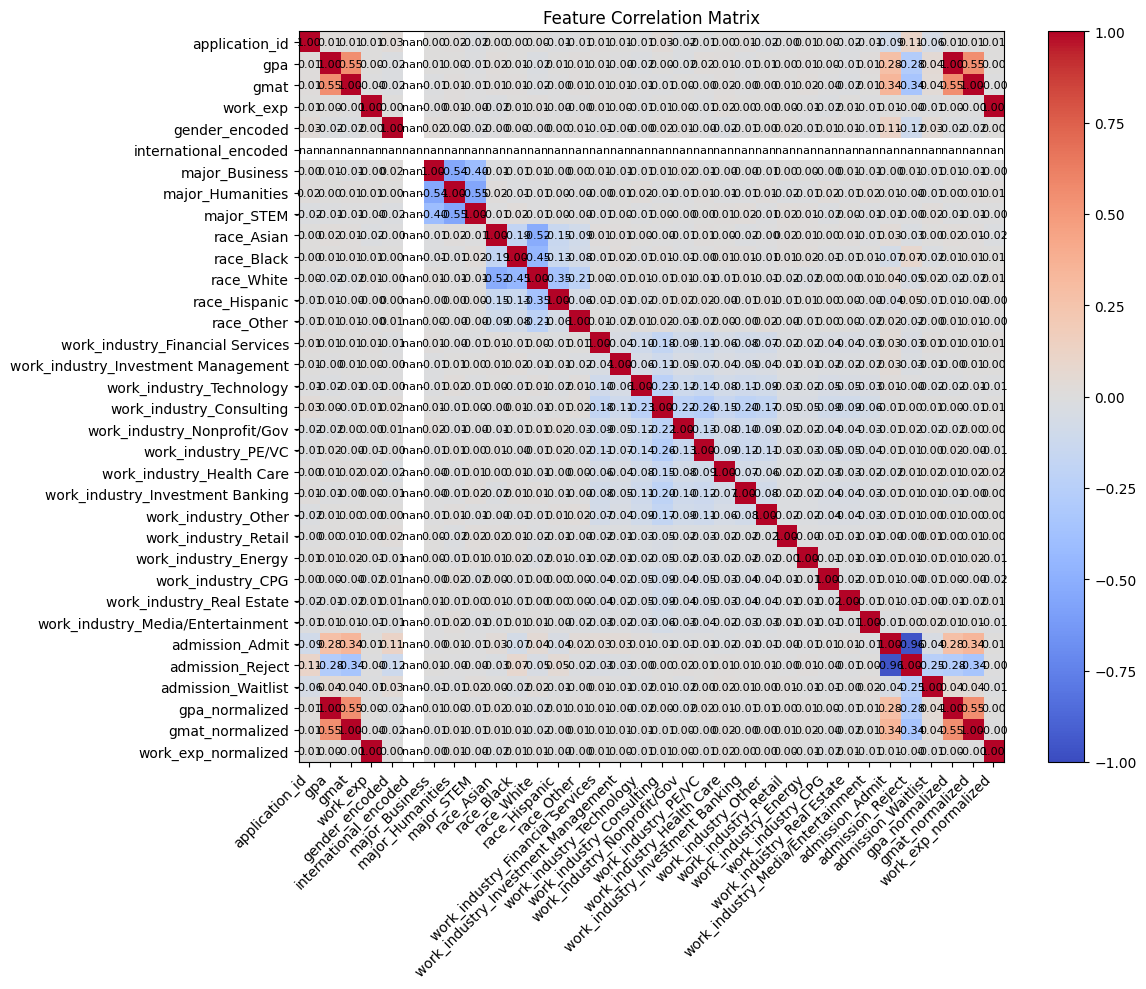


High correlation pairs (|correlation| > 0.7):
  gpa <-> gpa_normalized: 1.000
  gmat <-> gmat_normalized: 1.000
  work_exp <-> work_exp_normalized: 1.000
  admission_Admit <-> admission_Reject: -0.957

Statistics grouped by Admission Status:

gpa grouped by admission status:
  Admit: mean=3.350, std=0.125, median=3.340
  Reject: mean=3.232, std=0.144, median=3.240
  Waitlist: mean=3.306, std=0.119, median=3.310

gmat grouped by admission status:
  Admit: mean=691.276, std=40.541, median=690.000
  Reject: mean=643.810, std=46.067, median=640.000
  Waitlist: mean=667.189, std=33.007, median=670.000

work_exp grouped by admission status:
  Admit: mean=5.040, std=0.975, median=5.000
  Reject: mean=5.020, std=1.015, median=5.000
  Waitlist: mean=4.897, std=0.956, median=5.000

Additional Analysis:
Feature value ranges after normalization:
  gpa_normalized: range [-4.067, 3.529]
  gmat_normalized: range [-1.678, 2.682]
  work_exp_normalized: range [-3.988, 3.944]

All Data Processing Tasks 

In [2]:
# Complete Data Processing Tasks 1-6
print("="*60)
print("MBA Admission Dataset - Complete Data Processing")
print("="*60)

# Task 1: Basic Statistics
print("\n" + "="*50)
print("Task 1: Basic Statistics")
print("="*50)

# Separate numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical variables: {numerical_cols}")
print(f"Categorical variables: {categorical_cols}")

# Numerical variables statistics
print("\nNumerical Statistics:")
print(train_data[numerical_cols].describe())

# Categorical variables statistics
print("\nCategorical Statistics:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Count: {train_data[col].count()}")
    print(f"  Unique: {train_data[col].nunique()}")
    print(f"  Value counts:")
    print(train_data[col].value_counts())

# Task 2: Missing Value Handling
print("\n" + "="*50)
print("Task 2: Missing Value Handling")
print("="*50)

# Check missing values
print("Missing Values Summary:")
missing_counts = train_data.isnull().sum()
missing_percent = (missing_counts / len(train_data)) * 100

for col in train_data.columns:
    if missing_counts[col] > 0:
        print(f"{col}: {missing_counts[col]} ({missing_percent[col]:.1f}%)")

# Create copy for processing
train_processed = train_data.copy()

# Method 1: Fill numerical variables with mean
print("\nMethod 1: Fill numerical variables with mean")
for col in numerical_cols:
    if train_processed[col].isnull().sum() > 0:
        mean_val = train_processed[col].mean()
        train_processed[col].fillna(mean_val, inplace=True)
        print(f"{col}: filled with mean {mean_val:.2f}")

# Method 2: Fill categorical variables with mode
print("\nMethod 2: Fill categorical variables with mode")
for col in categorical_cols:
    if train_processed[col].isnull().sum() > 0:
        mode_val = train_processed[col].mode().iloc[0]
        train_processed[col].fillna(mode_val, inplace=True)
        print(f"{col}: filled with mode '{mode_val}'")

print(f"\nTotal missing values after processing: {train_processed.isnull().sum().sum()}")

# Task 3: Categorical Encoding
print("\n" + "="*50)
print("Task 3: Categorical Encoding")
print("="*50)

# Create copy for encoding
train_encoded = train_processed.copy()

# Gender: Label Encoding (manual implementation)
if 'gender' in train_encoded.columns:
    gender_mapping = {'Male': 0, 'Female': 1}
    train_encoded['gender_encoded'] = train_encoded['gender'].map(gender_mapping)
    print(f"Gender Label Encoding: {gender_mapping}")

# International: Ordinal Encoding (different from label and one-hot)
if 'international' in train_encoded.columns:
    international_mapping = {'FALSE': 0, 'TRUE': 1}
    train_encoded['international_encoded'] = train_encoded['international'].map(international_mapping)
    print(f"International Ordinal Encoding: {international_mapping}")

# Other categorical variables: One-Hot Encoding (manual implementation)
cols_to_onehot = [col for col in categorical_cols if col not in ['gender', 'international']]
print(f"\nColumns for One-Hot Encoding: {cols_to_onehot}")

for col in cols_to_onehot:
    if col in train_encoded.columns:
        unique_vals = train_encoded[col].unique()
        print(f"\n{col} unique values: {unique_vals}")
        
        # Create dummy variables manually
        for val in unique_vals:
            if pd.notna(val):  # Skip NaN values
                new_col_name = f"{col}_{val}"
                train_encoded[new_col_name] = (train_encoded[col] == val).astype(int)
        
        print(f"Created {len([v for v in unique_vals if pd.notna(v)])} new columns")

print(f"\nData shape after encoding: {train_encoded.shape}")

# Task 4: Numerical Feature Normalization
print("\n" + "="*50)
print("Task 4: Numerical Feature Normalization")
print("="*50)

# Manual Z-score normalization (standardization)
def z_score_normalize(series):
    """Manual Z-score normalization: (x - mean) / std"""
    mean_val = series.mean()
    std_val = series.std()
    return (series - mean_val) / std_val, mean_val, std_val

# Normalize key numerical columns
numerical_cols_to_normalize = ['gpa', 'gmat', 'work_exp']

for col in numerical_cols_to_normalize:
    if col in train_encoded.columns:
        normalized_col, mean_val, std_val = z_score_normalize(train_encoded[col])
        train_encoded[f'{col}_normalized'] = normalized_col
        
        print(f"\n{col} normalization:")
        print(f"  Original: mean={mean_val:.3f}, std={std_val:.3f}")
        print(f"  Normalized: mean={train_encoded[f'{col}_normalized'].mean():.3f}, std={train_encoded[f'{col}_normalized'].std():.3f}")

print(f"\nFinal data shape: {train_encoded.shape}")

# Task 5: Data Visualization
print("\n" + "="*50)
print("Task 5: Data Visualization")
print("="*50)

# 1. Target variable distribution
if 'admission' in train_processed.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart
    admission_counts = train_processed['admission'].value_counts()
    ax1.pie(admission_counts.values, labels=admission_counts.index, autopct='%1.1f%%')
    ax1.set_title('Admission Status Distribution')
    
    # Bar chart
    admission_counts.plot(kind='bar', ax=ax2)
    ax2.set_title('Admission Status Counts')
    ax2.set_xlabel('Admission Status')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# 2. Numerical variables distribution
numerical_viz_cols = ['gpa', 'gmat', 'work_exp']
valid_num_cols = [col for col in numerical_viz_cols if col in train_processed.columns]

if valid_num_cols:
    fig, axes = plt.subplots(2, len(valid_num_cols), figsize=(15, 8))
    
    for i, col in enumerate(valid_num_cols):
        # Histogram
        axes[0, i].hist(train_processed[col].dropna(), bins=20, alpha=0.7, edgecolor='black')
        axes[0, i].set_title(f'{col} Distribution')
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Frequency')
        
        # Box plot
        data_for_box = train_processed[col].dropna()
        axes[1, i].boxplot(data_for_box)
        axes[1, i].set_title(f'{col} Box Plot')
        axes[1, i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# 3. Categorical vs Target relationship
if 'admission' in train_processed.columns:
    categorical_viz_cols = ['gender', 'international', 'major']
    valid_cat_cols = [col for col in categorical_viz_cols if col in train_processed.columns]
    
    if valid_cat_cols:
        fig, axes = plt.subplots(1, len(valid_cat_cols), figsize=(15, 5))
        if len(valid_cat_cols) == 1:
            axes = [axes]
        
        for i, col in enumerate(valid_cat_cols):
            # Create cross-tabulation
            cross_tab = pd.crosstab(train_processed[col], train_processed['admission'])
            
            # Stacked bar chart
            cross_tab.plot(kind='bar', ax=axes[i], stacked=True)
            axes[i].set_title(f'{col} vs Admission Status')
            axes[i].set_xlabel(col)
            axes[i].legend(title='Admission')
            axes[i].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

# Task 6: Correlation Analysis and Additional Data Exploration
print("\n" + "="*50)
print("Task 6: Correlation Analysis and Additional Data Exploration")
print("="*50)

# Select numerical columns for correlation analysis
num_cols_for_corr = train_encoded.select_dtypes(include=[np.number]).columns.tolist()

if len(num_cols_for_corr) > 1:
    # Calculate correlation matrix
    correlation_matrix = train_encoded[num_cols_for_corr].corr()
    
    # Create correlation heatmap using matplotlib
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Create heatmap
    im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    
    # Set ticks and labels
    ax.set_xticks(range(len(correlation_matrix.columns)))
    ax.set_yticks(range(len(correlation_matrix.columns)))
    ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
    ax.set_yticklabels(correlation_matrix.columns)
    
    # Add correlation values to cells
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontsize=8)
    
    # Add colorbar
    plt.colorbar(im, ax=ax)
    ax.set_title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Find high correlation pairs
    print("\nHigh correlation pairs (|correlation| > 0.7):")
    high_corr_found = False
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                print(f"  {correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_value:.3f}")
                high_corr_found = True
    
    if not high_corr_found:
        print("  No high correlation pairs found")

# Group statistics by admission status
if 'admission' in train_processed.columns:
    print("\nStatistics grouped by Admission Status:")
    
    numerical_features = ['gpa', 'gmat', 'work_exp']
    valid_features = [col for col in numerical_features if col in train_processed.columns]
    
    for col in valid_features:
        print(f"\n{col} grouped by admission status:")
        grouped = train_processed.groupby('admission')[col]
        
        for status in train_processed['admission'].unique():
            if pd.notna(status):
                group_data = grouped.get_group(status)
                mean_val = group_data.mean()
                std_val = group_data.std()
                median_val = group_data.median()
                print(f"  {status}: mean={mean_val:.3f}, std={std_val:.3f}, median={median_val:.3f}")

# Additional exploration: Feature importance analysis
print("\nAdditional Analysis:")
print("Feature value ranges after normalization:")
normalized_cols = [col for col in train_encoded.columns if '_normalized' in col]
for col in normalized_cols:
    min_val = train_encoded[col].min()
    max_val = train_encoded[col].max()
    print(f"  {col}: range [{min_val:.3f}, {max_val:.3f}]")

print("\n" + "="*60)
print("All Data Processing Tasks Completed!")
print("="*60)

# Save processed data for future use
train_encoded.to_csv('train_processed.csv', index=False)
print("\nProcessed data saved as 'train_processed.csv'")